In [159]:
# 1.	Биномиальное
# 3 – число признаков
# 3 – число кластеров
# 1- метод к - среднего
# 2 - метод деревьев решений
# 1- эвклидово расстояние

In [160]:
#z = 3 Гипергеометрическое пространство
#p = 3 - три признака
#n = 5 - пять классов

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
dimensions = 3
observations_amount = 1500

In [163]:
import numpy as np
from sklearn.cluster import KMeans

observations_1 = np.random.hypergeometric(60, 20, 40, (observations_amount // 5, dimensions))
observations_2 = np.random.hypergeometric(60, 20, 40, (observations_amount // 5, dimensions)) + 10
observations_3 = np.random.hypergeometric(60, 20, 40, (observations_amount // 5, dimensions)) + 20
observations_4 = np.random.hypergeometric(60, 20, 40, (observations_amount // 5, dimensions)) + 30
observations_5 = np.random.hypergeometric(60, 20, 40, (observations_amount // 5, dimensions)) + 40

In [164]:
observations_1.shape

(300, 3)

In [165]:
observations_1

array([[30, 26, 31],
       [30, 34, 31],
       [31, 26, 32],
       [32, 30, 26],
       [29, 31, 30],
       [30, 32, 28],
       [29, 32, 27],
       [31, 28, 29],
       [31, 29, 30],
       [32, 29, 31],
       [34, 32, 28],
       [29, 33, 32],
       [35, 31, 28],
       [33, 30, 32],
       [30, 26, 33],
       [28, 31, 27],
       [28, 27, 28],
       [31, 34, 27],
       [30, 30, 28],
       [28, 31, 29],
       [31, 32, 31],
       [33, 29, 34],
       [29, 32, 29],
       [29, 30, 29],
       [29, 29, 31],
       [32, 33, 29],
       [26, 30, 29],
       [31, 28, 29],
       [29, 31, 35],
       [30, 32, 29],
       [34, 30, 34],
       [31, 28, 30],
       [28, 26, 31],
       [30, 30, 28],
       [29, 31, 30],
       [30, 29, 31],
       [33, 29, 26],
       [31, 31, 29],
       [26, 27, 30],
       [31, 29, 29],
       [30, 28, 31],
       [27, 31, 30],
       [30, 30, 27],
       [29, 30, 32],
       [29, 29, 29],
       [28, 32, 32],
       [27, 29, 27],
       [32, 2

In [166]:
observations = np.concatenate([observations_1, observations_2, observations_3, observations_4, observations_5], axis=0)
observations.shape

(1500, 3)

In [167]:
from sklearn.preprocessing import minmax_scale, normalize

normalized_observation = minmax_scale(observations, axis=0)

In [168]:
observations = normalized_observation

In [169]:
labels_0 = np.array([0 for i in range(300)]).reshape(300, 1)
labels_1 = np.array([1 for i in range(300)]).reshape(300, 1)
labels_2 = np.array([3 for i in range(300)]).reshape(300, 1)
labels_3 = np.array([4 for i in range(300)]).reshape(300, 1)
labels_4 = np.array([5 for i in range(300)]).reshape(300, 1)

labels = np.concatenate([labels_0, labels_1, labels_2, labels_3, labels_4], axis=0)

In [170]:
labels_0.shape

(300, 1)

In [171]:
labels.shape

(1500, 1)

In [172]:
labels

array([[0],
       [0],
       [0],
       ...,
       [5],
       [5],
       [5]], shape=(1500, 1))

In [173]:
#observations = observations.reshape((900,3))

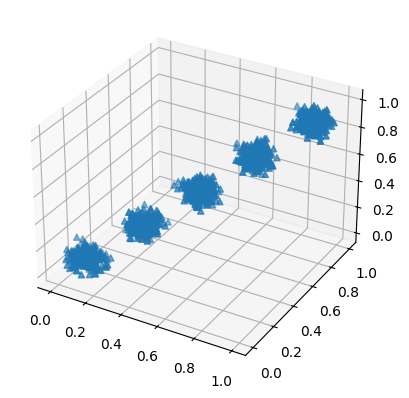

In [174]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(observations[:,0] , observations[:,1] , observations [:,2], marker='^')

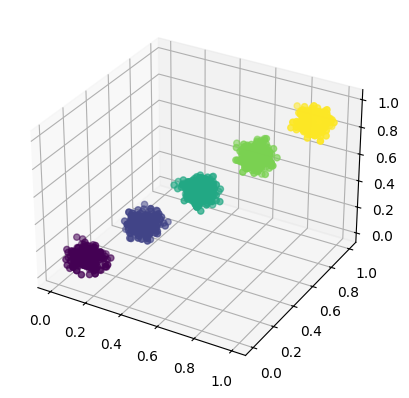

In [175]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(observations[:,0], observations[:,1], observations[:,2], marker='o', c=labels)

In [176]:
import matplotlib.pyplot as plt
import pandas as pd

import plotly.express as px
import plotly.io as pio

res_df = pd.DataFrame(observations)
fig = px.scatter_3d(res_df, x=0, y=1, z=2)

pio.renderers.default = "vscode"
fig.show()

In [177]:
fig = px.scatter_3d(res_df, x=0, y=1, z=2, color=labels.reshape(1500,))
fig.show()

In [178]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc = MinMaxScaler()
observations_fitted =pd.DataFrame(sc.fit_transform(res_df))
observations_fitted.describe()


,0,1,2
count,1500.000000,1500.000000,1500.000000
mean,0.500307,0.500520,0.489425
std,0.284576,0.285508,0.279379
min,0.000000,0.000000,0.000000
25%,0.280000,0.280000,0.274510
50%,0.500000,0.500000,0.490196
75%,0.720000,0.720000,0.705882
max,1.000000,1.000000,1.000000


In [179]:
fig = px.scatter_3d(observations_fitted, x=0, y=1, z=2, color=labels.reshape(1500,))
fig.show()

In [180]:
X_train, X_test, y_train, y_test = train_test_split(observations_fitted, labels.reshape(1500,), test_size=0.2, random_state=42)

**Осуществим кластеризацию методом k-средних**

In [181]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_train)

In [182]:
df_cluster_centers=pd.DataFrame(kmeans.cluster_centers_)
print(df_cluster_centers)

          0         1         2
0  0.703761  0.699573  0.683844
1  0.302894  0.305021  0.299124
2  0.101148  0.100820  0.097878
3  0.896017  0.901356  0.882602
4  0.498088  0.500239  0.486603


In [ ]:
from sklearn.metrics import confusion_matrix


print(confusion_matrix(y_train, kmeans.labels_))

[[  0   0 244   0   0   0]
 [  0 235   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0 251   0]
 [234   0   0   0   0   0]
 [  0   0   0 236   0   0]]


In [ ]:
print(confusion_matrix(y_test, kmeans.predict(X_test)))

[[ 0  0 56  0  0  0]
 [ 0 65  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0 49  0]
 [66  0  0  0  0  0]
 [ 0  0  0 64  0  0]]


In [185]:
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[
	go.Scatter3d(
      	x=X_train[0], y=X_train[1], z=X_train[2], mode='markers', marker=dict(size=2, color=kmeans.labels_)
  	),

	go.Scatter3d(
  		x=df_cluster_centers[0],
  		y=df_cluster_centers[1],
  		z=df_cluster_centers[2],
  		mode='markers',
  		marker=dict(size=4,color='red')
	)
])
fig.show()

## Перцептрон

In [187]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, recall_score

In [188]:
perceptron = Perceptron(max_iter=10000, random_state=42, penalty='l2')
perceptron.fit(X_train, y_train)

Perceptron(max_iter=10000, penalty='l2', random_state=42)

In [189]:
y_pred = perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
print(f'accuracy: {accuracy}')
print(f'recall: {recall}')

accuracy: 0.3433333333333333
recall: 0.31384615384615383


In [190]:
y_pred

array([4, 4, 1, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 1, 4, 4, 4, 4, 1, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 1, 4, 1, 4, 4,
       4, 4, 1, 4, 4, 4, 4, 1, 4, 4, 1, 4, 1, 4, 1, 4, 4, 4, 1, 1, 4, 1,
       1, 4, 4, 1, 1, 4, 4, 1, 4, 4, 4, 1, 1, 4, 4, 1, 1, 4, 4, 1, 4, 4,
       4, 4, 4, 1, 1, 4, 4, 1, 4, 1, 4, 1, 4, 4, 4, 4, 1, 1, 1, 4, 1, 4,
       4, 4, 4, 1, 1, 4, 4, 1, 1, 4, 4, 4, 4, 1, 1, 4, 4, 4, 4, 1, 4, 1,
       4, 4, 4, 1, 1, 4, 4, 1, 4, 1, 4, 1, 1, 4, 4, 4, 1, 4, 4, 4, 4, 4,
       1, 4, 4, 1, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1,
       4, 4, 4, 4, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 1,
       4, 1, 4, 4, 1, 4, 4, 4, 1, 4, 4, 4, 1, 4, 4, 4, 1, 1, 4, 1, 4, 1,
       4, 4, 4, 1, 1, 4, 1, 1, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 1, 1, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 4,
       4, 4, 1, 1, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 4, 4, 4, 4, 4, 4])

In [ ]:
loss_history_train = []
loss_history_test = []

n_epochs = 10

In [ ]:
class RosenblattPerceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.aclivation_func = self._relu
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.aclivation_func(linear_output)

                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.aclivation_func(linear_output)
        return y_predicted

	#функция активации (если результат сумматора >= 0, то результат = 1)
    def _unit_step_func(self, x):
        return np.where(x>=0, 1, 0)

In [ ]:
perceptron = RosenblattPerceptron(max_iter=10000, random_state=42, penalty='l2')
perceptron.fit(X_train, y_train)